# 데이터 준비 & 라이브러리 설치

In [3]:
import pandas as pd

df = pd.read_csv('/Users/JooAnLee/mid_project/src/datasets/수도권_아파트_청약_뉴스_크롤링_청약기간내.csv')
df.head(10)

,공고번호,apartment,title,content,url
0,2025000043,부천 JY 포에시아,'안동용상하늘채리버스카이' 등 1205가구 분양예정[분양캘린더],견본주택 '용현우방아이유쉘센트럴마린' 개관[서울=뉴시스][서울=뉴시스]정진형 기자 ...,https://n.news.naver.com/mnews/article/003/001...
1,2025000043,부천 JY 포에시아,다음 주 전국 분양물량 1205가구에 그쳐…서울은 '無',다음 주 분양 물량이 전주의 절반에도 미치지 못하는 1200여가구에 그칠 것으로 보...,https://n.news.naver.com/mnews/article/277/000...
2,2025000043,부천 JY 포에시아,분양 성수기인데…내주 전국서 1205가구 공급 그쳐,부동산R114 주간 부동산 분양 캘린더봄철 분양 성수기에도 분양 시장은 침체기가 이...,https://n.news.naver.com/mnews/article/015/000...
3,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),"3월 첫째주, 전국 2334가구 청약…지방 물량 집중",전국 6곳 청약 접수서울·인천 수도권 2곳3월 첫째 주 전국 6곳에서 총 2334가...,https://n.news.naver.com/mnews/article/277/000...
4,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),[주간분양] 수도권 청약 물량 희귀…전국 2334가구 중 35가구,전국 6곳 중 4곳이 지방…2299가구 공급28일 리얼투데이에 따르면 3월 첫째 주...,https://n.news.naver.com/mnews/article/119/000...
5,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),"""2년 4개월만에 2%대 기준금리...이자 부담 좀 줄지 않을까""",3월 첫주 전국 3445가구 청약 접수리얼투데이 제공[파이낸셜뉴스] 한국은행이 기준...,https://n.news.naver.com/mnews/article/014/000...
6,2025000001,래미안 원페를라,4인 가족 아니면 강남권 당첨 어려워,원페를라 최저 당첨 가점 69점인기 높은 강남…일반분양 적어주변 시세 대비 5억원가...,https://n.news.naver.com/mnews/article/015/000...
7,2025000001,래미안 원페를라,"""3인 가족이 어디 당첨 꿈을 꿔"" 올해 첫 로또청약 결과는","방배동 래미안 원페를라 당첨 최저가점 69점4인 가구 기준 청약통장, 무주택 만점해...",https://n.news.naver.com/mnews/article/014/000...
8,2025000001,래미안 원페를라,"저출생 난리인데…""강남 로또 잡으려면 아이 둘은 있어야""","서울 서초구 방배동 '래미안 원페를라' 당첨자 발표최저 당첨 가점 69점…""3인 가...",https://n.news.naver.com/mnews/article/015/000...
9,2024000396,부천 중앙하이츠 심곡 102동,경기 2월 아파트 분양 2989세대…'분양가상한제 훈풍탈까',전국 물량의 33.6%남산에서 바라본 서울 도심 아파트 모습. 2025.1.17/뉴...,https://n.news.naver.com/mnews/article/421/000...


In [4]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from konlpy.tag import Okt
import re

# 전처리

In [5]:
# 코퍼스 생성 (content 컬럼 데이터를 리스트로 변환)
corpus = df['content'].tolist()
print(corpus[:3])

["견본주택 '용현우방아이유쉘센트럴마린' 개관[서울=뉴시스][서울=뉴시스]정진형 기자 = 부동산R114는 3월 둘째 주 전국 3개 단지 총 1205가구가 분양을 시작한다고 8일 밝혔다. 모두 일반분양 물량이다.청약 접수는 경기 부천시 심곡동 '부천JY포에시아', 경북 안동시 용상동 '안동용상하늘채리버스카이', 울산 울주군 삼남읍 '울산에피트스타시티' 등에서 진행된다. 모델하우스는 인천 미추홀구 용현동 ‘용현우방아이유쉘센트럴마린’ 1곳이 개관한다.코오롱글로벌은 경북 안동시 용상동 일원에 '안동용상하늘채리버스카이'를 분양한다. 지하 2층~지상 최고 26층, 9개동, 전용면적 84㎡, 총 548가구 규모다. 단지 앞 경동로를 통한 안동 시내·외 이동이 편리하며 용상교리신국도를 비롯한 용상중로, 안동 외곽순환도로 교차로 등이 개통되면 교통 여건이 개선될 전망이다. 선어대 생태공원, 낙천공원, 낙동강 등 자연환경이 풍부하며 안동다목적체육관, 안동문화관광단지가 자리해 생활 편의성이 좋다.SM스틸·SM경남기업은 인천 미추홀구 용현동 일원에서 새한아파트 주택재건축을 통해 주상복합 아파트 '용현우방아이유쉘센트럴마린'을 분양할 예정이다. 지하 3층~지상 최고 41층, 2개동, 전용면적 59~76㎡, 총 252가구 중 아파트 196가구(오피스텔 76실 별도)를 일반분양한다. 수인분당선 숭의역을 이용할 수 있고 제2경인고속도로, 수도권제2순환고속도로 등 광역 교통망도 잘 갖춰져 있다. 신선초, 신흥중, 신흥여중 등 학교가 가깝고 인하대병원, 옹진군청, 대형마트 등 기반 시설도 인접한다．", '다음 주 분양 물량이 전주의 절반에도 미치지 못하는 1200여가구에 그칠 것으로 보인다.8일 부동산R114에 따르면 오는 10일부터 16일까지 전국에서 3개 단지, 1205가구가 분양된다. 이는 전주 2753가구와 비교하면 56% 감소한 수치다.서울은 분양 물량이 전무하다. 지난달 래미안 원페를라 공급을 마지막으로 5주째 일반 분양 물량이 없다.공급 예정인 3개 단지는 경기 부천시 심곡동 \'

In [6]:
# 형태소 분석기 설정
okt = Okt()

# 불용어 정리
with open('stopwords-ko.txt', 'r') as f:
  list_file = f.readlines() 
stopwords_default = [word[:-1] for word in list_file ]
stopwords_default
stopwords = stopwords_default # 기본

# 1. 텍스트 정제 함수 (특수문자, 숫자 제거)
def clean_text(text):
    text = re.sub(r'\[.*?\]|\(.*?\)', '', text) # (), [] 괄호 안 내용 제거
    text = re.sub(r'[^가-힣\s]', '', text)  # 한글과 공백 제외 문자 제거
    text = re.sub(r'\s+', ' ', text).strip()  # 연속 공백 제거
    return text

# 2. 형태소 분석을 통한 명사 추출 함수
def extract_nouns(text):
    nouns = okt.nouns(text)  # 형태소만 추출
    nouns = [word for word in nouns if word not in stopwords and len(word) > 1]  # 불용어 제거 및 한 글자 단어 제외
    return ' '.join(nouns)

# 3. 전체 데이터 전처리
corpus = df['content'].tolist()
cleaned_corpus = [extract_nouns(clean_text(text)) for text in corpus]  # 정제 + 명사 추출

In [7]:
cleaned_corpus[:5]

['견본주택 우방 아이유 센트럴 마린 개관 정진 기자 부동산 둘째 전국 가구 분양 시작 일반 분양 물량 청약 접수 경기 부천시 심곡동 부천 시아 경북 안동시 용상동 안동 용상 하늘 리버 스카이 울산 울주군 삼남 울산 피트 스타 시티 진행 모델하우스 인천 미추홀 용현동 우방 아이유 센트럴 마린 개관 코오롱 글로벌 경북 안동시 용상동 일원 안동 용상 하늘 리버 스카이 분양 지하 지상 최고 전용 면적 가구 규모 경동로 통한 안동 내외 이동 용상 교리 국도 비롯 용상 안동 외곽순환 도로 교차로 개통 교통 여건 개선 전망 선어 생태 공원 낙천 공원 낙동강 자연환경 동다 목적 체육관 안동 문화 관광 자리 생활 편의 스틸 경남 기업 인천 미추홀 용현동 일원 아파트 주택 재건축 통해 주상 복합 아파트 우방 아이유 센트럴 마린 분양 예정 지하 지상 최고 전용 면적 가구 아파트 가구 일반 수인 분당선 숭의역 이용 경인 고속도로 수도권 순환 고속도로 광역 교통 신선 신흥 신흥 여중 학교 인하대병원 옹진군 대형 마트 기반 시설 인접',
 '분양 물량 전주 절반 가구 부동산 전국 가구 분양 전주 가구 비교 감소 수치 서울 분양 물량 지난달 래미안 원페를 공급 마지막 일반 분양 물량 공급 예정 경기 부천시 심곡동 부천 시아 경북 안동시 용상동 안동 용상 하늘 리버 스카이 울산 울주군 삼남 울산 피트 스타 시티 부동산 계획 분양 물량 일부 건설 미분 우려 분양 일정 조정 청약 온기 기대 확산',
 '부동산 주간 부동산 분양 캘린더 봄철 분양 수기 분양 시장 침체 내주 공급물량 가구 전망 부동산 내주 전국 가구 가구 절반 수준 지난해 한주 최대 가구 공급 기도 일반 분양 수기 서울 제외 지역 청약 경쟁률 정치 불확실 성과 경기 침체 지속 전반 청약 심리 위축 공급 물량 감소 분석 서울 분양 물량 서울 지난달 첫째 래미안 원페를 공급 마지막 일반 분양 물량 상황 지속 공급 경기 부천시 원미구 심곡동 부천 시아 경북 안동시 용상동 안동 용상 하늘 리버 스카이 울산 울주군 삼남 울산 피트 스타

# 1차

In [8]:
# 최적의 CountVectorizer 파라미터 탐색
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 성능 평가 함수 정의
def evaluate_vectorizer_params(cleaned_corpus, param_grid):
    results = []
    
    # 각 파라미터 조합에 대해 평가
    for max_df in param_grid['max_df']:
        for min_df in param_grid['min_df']:
            for max_features in param_grid['max_features']:
                print(f"Testing max_df={max_df}, min_df={min_df}, max_features={max_features}")
                
                # 벡터라이저 생성 및 적용
                vectorizer = CountVectorizer(
                    max_df=max_df,
                    min_df=min_df,
                    max_features=max_features,
                    ngram_range=(1, 2)  # 유니그램과 바이그램 사용
                )
                
                try:
                    dtm = vectorizer.fit_transform(cleaned_corpus)
                    feature_names = vectorizer.get_feature_names_out()
                    
                    # 적절한 토픽 수 (예: 10)로 LDA 모델 생성
                    lda = LatentDirichletAllocation(
                        n_components=10,
                        random_state=42,
                        max_iter=10
                    )
                    
                    # 모델 학습 및 평가
                    lda.fit(dtm)
                    perplexity = lda.perplexity(dtm)
                    
                    # 주요 평가 지표 저장
                    results.append({
                        'max_df': max_df,
                        'min_df': min_df,
                        'max_features': max_features,
                        'vocabulary_size': len(feature_names),
                        'perplexity': perplexity,
                        'log_likelihood': lda.score(dtm)
                    })
                except Exception as e:
                    print(f"Error with parameters: {e}")
    
    # 결과를 DataFrame으로 반환
    return pd.DataFrame(results)

# 테스트할 파라미터 정의
param_grid = {
    'max_df': [0.5, 0.6, 0.7, 0.8, 0.9],      # 최대 문서 빈도
    'min_df': [5, 10, 20, 30],          # 최소 문서 빈도
    'max_features': [1000, 2000, 3000]  # 최대 특성 수
}

# 파라미터 평가 실행
results_df = evaluate_vectorizer_params(cleaned_corpus, param_grid)

# 결과 정렬 (복잡도 기준)
results_df = results_df.sort_values(by='perplexity')

# 상위 결과 출력
print("\n최적의 벡터라이저 파라미터 (perplexity 기준):")
print(results_df.head())

# 최적의 파라미터 추출
best_params = results_df.iloc[0][['max_df', 'min_df', 'max_features']].to_dict()
print(f"\n최적의 파라미터: {best_params}")

Testing max_df=0.5, min_df=5, max_features=1000
Testing max_df=0.5, min_df=5, max_features=2000
Testing max_df=0.5, min_df=5, max_features=3000
Testing max_df=0.5, min_df=10, max_features=1000
Testing max_df=0.5, min_df=10, max_features=2000
Testing max_df=0.5, min_df=10, max_features=3000
Testing max_df=0.5, min_df=20, max_features=1000
Testing max_df=0.5, min_df=20, max_features=2000
Testing max_df=0.5, min_df=20, max_features=3000
Testing max_df=0.5, min_df=30, max_features=1000
Testing max_df=0.5, min_df=30, max_features=2000
Testing max_df=0.5, min_df=30, max_features=3000
Testing max_df=0.6, min_df=5, max_features=1000
Testing max_df=0.6, min_df=5, max_features=2000
Testing max_df=0.6, min_df=5, max_features=3000
Testing max_df=0.6, min_df=10, max_features=1000
Testing max_df=0.6, min_df=10, max_features=2000
Testing max_df=0.6, min_df=10, max_features=3000
Testing max_df=0.6, min_df=20, max_features=1000
Testing max_df=0.6, min_df=20, max_features=2000
Testing max_df=0.6, min_df

In [9]:
# CountVectorizer로 전처리한 기사 텍스트를 빈도수 기반 단어 추출
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_df=0.9,  # 전체 문서의 80% 이상 등장한 단어 제외
    min_df=10,    # Minimum Document Frequency, 최소 문서 빈도 = min_df=5면 최소 5개 문서에서 등장해야 포함됨
    max_features=1000,
    ngram_range=(1, 3),  # unigram + bigram + trigram 사용
    token_pattern=r'\b\w+\b'  # 숫자 포함 단어도 추출 가능
)

dtm = vectorizer.fit_transform(cleaned_corpus)  # 전처리된 데이터로 DTM 생성
dtm.shape

# 추출된 단어 리스트 출력
words = vectorizer.get_feature_names_out()
print("✅ 추출된 키워드 목록:", words[:1000])

✅ 추출된 키워드 목록: ['가가' '가격' '가격 경쟁력' '가구' '가구 가구' '가구 가구 가구' '가구 공급' '가구 구성' '가구 규모'
 '가구 규모 조성' '가구 모집' '가구 모집 신청' '가구 모집 접수' '가구 모집 청약' '가구 모집 평균' '가구 분양'
 '가구 일반' '가구 일반 분양' '가구 전용' '가구 조성' '가구 청약' '가구 청약 접수' '가까이' '가능성' '가도'
 '가든' '가량' '가로' '가운데' '가입' '가입 기간' '가장' '가점' '가족' '가치' '감소' '감정' '감정 청약'
 '강남' '강남구' '강동' '강동구' '강북구' '강원' '강화' '개관' '개발' '개발 사업' '개발 호재' '개방' '개선'
 '개월' '개통' '개통 예정' '거래' '거리' '거실' '거주' '거주 의무' '건립' '건설' '건설 경기' '건설 경기도'
 '건의' '건의 청약' '견본주택' '견본주택 개관' '견본주택 오픈' '결과' '결과 가구' '결과 가구 모집' '경기'
 '경기도' '경남' '경우' '경의' '경인' '경인 고속도로' '경쟁' '경쟁력' '경쟁률' '경쟁률 기록' '경쟁률 전용'
 '경제' '경제 무단' '경제 무단 배포' '계속' '계약' '계약 일간' '계약 일간 진행' '계약 진행' '계약금' '계양'
 '계획' '고가' '고객' '고덕' '고려' '고속도로' '고양' '고양시' '곤지암' '골프' '골프 연습장' '공간' '공개'
 '공고' '공급' '공급 가구' '공급 가구 모집' '공급 물량' '공급 순위' '공급 시작' '공급 시작 순위' '공급 예정'
 '공급 청약' '공사' '공원' '과천' '관계자' '관련' '관심' '광명' '광역' '광역급행' '광역급행 철도' '광주'
 '광주시' '교육' '교육 환경' '교통' '구가' '구간' '구독' '구성' '구역' '구역 재개발' '구조' '국제'
 '국토교통부' '규모' '규모 가구' '규모 조성' '규제' '규제 완화' '규제 지역

'로또'는 나오지만 '로또 청약'은 나오지 않음

## LDA

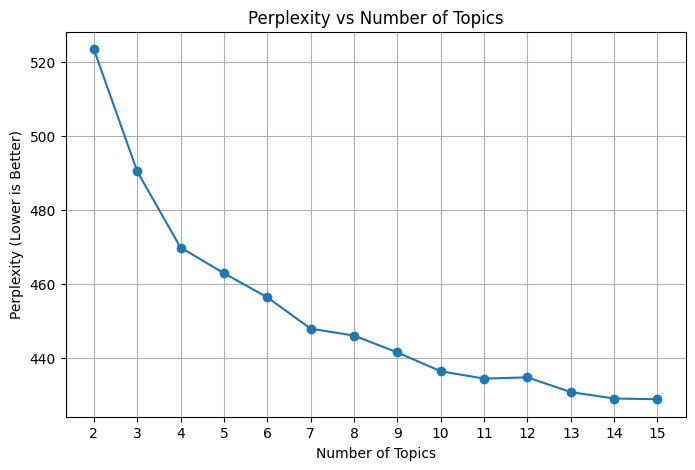

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

import re
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

# 2. 최적 토픽 개수 찾기
perplexities = []
topic_range = range(2, 16)  # 토픽 개수 2개 ~ 16개 테스트

for n_topics in topic_range:
    lda = LatentDirichletAllocation(
        n_components=n_topics, 
        doc_topic_prior=0.1,
        # topic_word_prior=0.01,
        max_iter=10,  # 충분한 학습 횟수
        learning_method='batch',  # 안정적인 batch 학습
        random_state=42,
        n_jobs=-1  # 병렬 처리
    )
    lda.fit(dtm)
    perplexities.append(lda.perplexity(dtm))  # perplexity 저장

# 3. Perplexity 시각화
plt.figure(figsize=(8, 5))
plt.plot(topic_range, perplexities, marker='o', linestyle='-')
plt.title('Perplexity vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity (Lower is Better)')
plt.xticks(topic_range)
plt.grid()
plt.show()

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 사용자 정의 scorer: 음의 perplexity를 반환 (낮은 perplexity가 좋은 모델이므로)
def neg_perplexity_scorer(estimator, X):
    return -estimator.perplexity(X)

# 또는 make_scorer를 사용해 scorer 생성
scorer = make_scorer(neg_perplexity_scorer, greater_is_better=True)

# LDA 하이퍼파라미터 후보 설정
param_grid_lda = {
    'n_components': [7, 8, 9, 10],  # 앞서 perplexity 결과에서 적정 범위
    'doc_topic_prior': [0.2, 0.3, 0.4],
    'topic_word_prior': [0.01, 0.1, 0.5],
    'max_iter': [10, 20]
}

# LDA 모델 생성 (learning_method='batch'로 안정적인 학습)
lda = LatentDirichletAllocation(
    learning_method='batch', 
    random_state=42, 
    n_jobs=-1
)

# GridSearchCV로 최적의 하이퍼파라미터 탐색 (교차검증 cv=3 사용)
grid_search_lda = GridSearchCV(
    lda, 
    param_grid_lda, 
    scoring=scorer, 
    cv=3, 
    verbose=2
)

# 이미 생성된 DTM (예: dtm)을 사용하여 그리드서치 실행
grid_search_lda.fit(dtm)

# 최적의 파라미터 및 결과 출력
print("최적의 LDA 모델 하이퍼파라미터:")
print(grid_search_lda.best_params_)
print("\n최적의 점수 (음의 perplexity):")
print(grid_search_lda.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/opt/anaconda3/envs/Jooan_Lee/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Jooan_Lee/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV] END doc_topic_prior=0.2, max_iter=10, n_components=7, topic_word_prior=0.01; total time=   2.3s
[CV] END doc_topic_prior=0.2, max_iter=10, n_components=7, topic_word_prior=0.01; total time=   2.3s
[CV] END doc_topic_prior=0.2, max_iter=10, n_components=7, topic_word_prior=0.01; total time=   2.2s
[CV] END doc_topic_prior=0.2, max_iter=10, n_components=7, topic_word_prior=0.1; total time=   2.3s
[CV] END doc_topic_prior=0.2, max_iter=10, n_components=7, topic_word_prior=0.1; total time=   2.3s
[CV] END doc_topic_prior=0.2, max_iter=10, n_components=7, topic_word_prior=0.1; total time=   2.5s
[CV] END doc_topic_prior=0.2, max_iter=10, n_components=7, topic_word_prior=0.5; total time=   2.6s
[CV] END doc_topic_prior=0.2, max_iter=10, n_components=7, topic_word_prior=0.5; total time=   2.4s
[CV] END doc_topic_prior=0.2, max_iter=10, n_components=7, topic_word_prior=0.5; total time=   2.6s
[CV] END doc_topic_prior=0.2, max_iter=10, n_components=8, topic_word_prior=0.01; total time=   3

/opt/anaconda3/envs/Jooan_Lee/lib/python3.11/site-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


최적의 LDA 모델 하이퍼파라미터:
{'doc_topic_prior': 0.2, 'max_iter': 10, 'n_components': 7, 'topic_word_prior': 0.01}

최적의 점수 (음의 perplexity):
nan


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import pprint

# 최적의 하이퍼파라미터로 LDA 모델 학습 (토픽 수 7개)
lda = LatentDirichletAllocation(
    n_components=7, 
    doc_topic_prior=0.2, 
    topic_word_prior=0.01,
    max_iter=10,
    learning_method='batch',
    random_state=42
)
lda.fit(dtm)



# 토픽 이름: 실제 토픽 수에 맞춰 "토픽 1" ~ "토픽 7" 사용
topic_names = [f'토픽 {i}' for i in range(1, 8)]
terms = vectorizer.get_feature_names_out()
topic_keywords = {}

# 토픽별 상위 10개 키워드 추출
for i, topic in enumerate(lda.components_):
    top_keywords = [terms[j] for j in topic.argsort()[-10:][::-1]]
    topic_keywords[topic_names[i]] = top_keywords

# 각 기사별 토픽 분포 (토픽 점수) 계산
doc_topic = lda.transform(dtm)

results = []
for i, topic_dist in enumerate(doc_topic):
    top_topic = topic_dist.argmax()
    result = {
        '기사 번호': i + 1,
        '주요 토픽': topic_names[top_topic],
    }
    # 각 토픽에 대한 점수를 소수점 4자리로 반올림하여 결과에 추가
    result.update({topic_names[j]: round(topic_dist[j], 4) for j in range(len(topic_names))})
    results.append(result)

df_results = pd.DataFrame(results)

# 결과 출력
print("\n[토픽별 주요 키워드]")
pprint.pprint(topic_keywords)

print("\n[기사별 주요 토픽 점수]")
df_results.head()


[토픽별 주요 키워드]
{'토픽 1': ['공급', '전용', '억원', '아파트', '대출', '주택', '가구', '억만원', '적용', '서울'],
 '토픽 2': ['경쟁률', '가구', '순위', '모집', '기록', '전용', '가구 모집', '평균', '경쟁률 기록', '접수'],
 '토픽 3': ['세대', '순위', '공급', '아파트', '진행', '순위 청약', '당첨', '계약', '타입', '발표'],
 '토픽 4': ['당첨', '가점', '주택', '지역', '통장', '서울', '최고', '공급', '전용', '평균'],
 '토픽 5': ['아파트', '서울', '시장', '경쟁률', '가구', '순위', '부동산', '지역', '수도권', '미달'],
 '토픽 6': ['가구', '예정', '시설', '가구 가구', '순위', '공원', '조성', '위치', '지역', '고속도로'],
 '토픽 7': ['가구', '전용', '접수', '지상', '경기', '지하', '면적', '전용 면적', '지하 지상', '청약 접수']}

[기사별 주요 토픽 점수]


,기사 번호,주요 토픽,토픽 1,토픽 2,토픽 3,토픽 4,토픽 5,토픽 6,토픽 7
0,1,토픽 7,0.0016,0.0016,0.0016,0.0016,0.0016,0.2367,0.7555
1,2,토픽 7,0.0040,0.0039,0.0039,0.0040,0.4600,0.0040,0.5202
2,3,토픽 5,0.0023,0.0023,0.0023,0.0023,0.6225,0.0023,0.3660
3,4,토픽 7,0.0016,0.0016,0.0016,0.0016,0.1261,0.0016,0.8660
4,5,토픽 7,0.0009,0.0009,0.0010,0.0009,0.0010,0.0010,0.9943


토픽 1 : 대출 및 가격\
토픽 2 : 경쟁률\
토픽 3 : 순위\
토픽 4 : 가점\
토픽 5 : 미달\
토픽 6 : 위치, 지역 \
토픽 7 : 전용면적

In [13]:
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

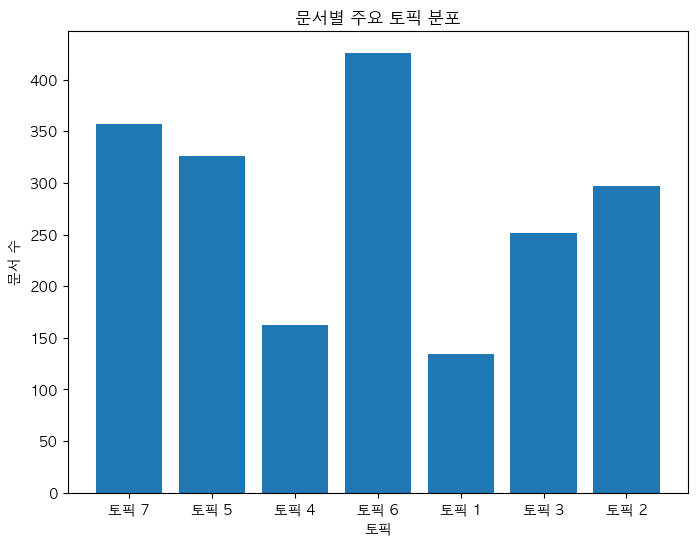

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

# 각 문서에서 가장 높은 비중의 토픽 인덱스 추출
dominant_topics = doc_topic.argmax(axis=1)
# 토픽 인덱스를 토픽 이름으로 변환
dominant_topic_names = [topic_names[i] for i in dominant_topics]

# 각 토픽별 문서 수 계산
topic_counts = Counter(dominant_topic_names)

# 바 차트로 시각화
plt.figure(figsize=(8, 6))
plt.bar(topic_counts.keys(), topic_counts.values())
plt.xlabel('토픽')
plt.ylabel('문서 수')
plt.title('문서별 주요 토픽 분포')
plt.show()

In [15]:
# LDA 모델 성능 평가: Perplexity 계산
perplexity_value = lda.perplexity(dtm)
print("LDA 모델의 Perplexity:", perplexity_value)

LDA 모델의 Perplexity: 459.80552990811844


# 2차

In [16]:
# CountVectorizer로 전처리한 기사 텍스트를 빈도수 기반 단어 추출
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_df=0.8,  # 전체 문서의 80% 이상 등장한 단어 제외
    min_df=20,    # Minimum Document Frequency, 최소 문서 빈도 = min_df=5면 최소 5개 문서에서 등장해야 포함됨
    max_features=3000,
    ngram_range=(1, 3),  # unigram + bigram + trigram 사용
    token_pattern=r'\b\w+\b'  # 숫자 포함 단어도 추출 가능
)

dtm2 = vectorizer.fit_transform(cleaned_corpus)  # 전처리된 데이터로 DTM 생성
dtm2.shape

# 추출된 단어 리스트 출력
words = vectorizer.get_feature_names_out()
print("✅ 추출된 키워드 목록:", words[:1000])

✅ 추출된 키워드 목록: ['가가' '가가 만원' '가가 억만원' '가가 억원' '가가 책정' '가격' '가격 경쟁력' '가격 공개' '가격 공개 뉴시스'
 '가격 공급' '가격 분양' '가격 상승' '가구 가구' '가구 가구 가구' '가구 가구 구성' '가구 가구 분양'
 '가구 가구 일반' '가구 가운데' '가구 공급' '가구 공급 청약' '가구 구성' '가구 규모' '가구 규모 가구'
 '가구 규모 전용' '가구 규모 조성' '가구 대규모' '가구 대한' '가구 모집' '가구 모집 가구' '가구 모집 건의'
 '가구 모집 경쟁률' '가구 모집 몰리' '가구 모집 순위' '가구 모집 신청' '가구 모집 접수' '가구 모집 지원'
 '가구 모집 천명' '가구 모집 청약' '가구 모집 평균' '가구 미달' '가구 분양' '가구 분양 시작' '가구 분양 예정'
 '가구 블록' '가구 순위' '가구 순위 청약' '가구 아파트' '가구 오피스텔' '가구 일반' '가구 일반 분양' '가구 전용'
 '가구 전용 면적' '가구 조성' '가구 주택' '가구 청약' '가구 청약 접수' '가구 타입' '가구 특별' '가구 특별 공급'
 '가까이' '가능' '가능성' '가도' '가든' '가량' '가로' '가로 공급' '가운데' '가운데 가구' '가의' '가입'
 '가입 기간' '가입 기간 개월' '가입자' '가장' '가장 경쟁률' '가장 청약' '가재' '가점' '가점 기록' '가점 당첨'
 '가점 만점' '가점 전용' '가점 주택' '가점 청약' '가점 최고' '가점 최저' '가점 추첨' '가점 통장' '가족'
 '가족 기준' '가지' '가치' '가평' '가평군' '간선' '간선 도로' '갈수록' '감소' '감안' '감염' '감염증' '감일'
 '감정' '감정 청약' '감정 청약 전날' '강남' '강남 분대' '강남구' '강동' '강동구' '강변' '강북' '강북구'
 '강북구 미아동' '강서구' '강선' '강원' '강일' '강점' '강화' '개관' '개관 본격' '개관 본격

In [17]:
# 최적의 하이퍼파라미터로 LDA 모델 학습 (토픽 수 8개)
lda = LatentDirichletAllocation(
    n_components=8, 
    doc_topic_prior=0.1,   # 높을수록, 각 문서가 모든 토픽에 대해 더 균일한 확률을 가질 가능성이 높아집니다. 낮을수록, 문서가 특정 토픽에 강하게 집중될 가능성이 높아집니다
    topic_word_prior=0.01,   # 낮을수록, 각 토픽이 더 적은 수의 단어에 집중되도록 유도되어 sparse word distribution이 형성됨. 이는 각 토픽이 더 구체적이고 명확한 단어 집합을 가질 수 있도록 합니다
    max_iter=10,  # 모델 학습시 최대 반복 횟수
    learning_method='batch',
    random_state=42
)
lda.fit(dtm2)

# 토픽 이름: 실제 토픽 수에 맞춰 "토픽 1" ~ "토픽 8" 사용
topic_names = [f'토픽 {i}' for i in range(1, 9)]
terms = vectorizer.get_feature_names_out()
topic_keywords = {}

# 토픽별 상위 10개 키워드 추출
for i, topic in enumerate(lda.components_):
    top_keywords = [terms[j] for j in topic.argsort()[-10:][::-1]]
    topic_keywords[topic_names[i]] = top_keywords

# 각 기사별 토픽 분포 (토픽 점수) 계산
doc_topic = lda.transform(dtm2)

results = []
for i, topic_dist in enumerate(doc_topic):
    top_topic = topic_dist.argmax()
    result = {
        '기사 번호': i + 1,
        '주요 토픽': topic_names[top_topic],
    }
    # 각 토픽에 대한 점수를 소수점 4자리로 반올림하여 결과에 추가
    result.update({topic_names[j]: round(topic_dist[j], 4) for j in range(len(topic_names))})
    results.append(result)

df_results = pd.DataFrame(results)

# 결과 출력
print("\n[토픽별 주요 키워드]")
pprint.pprint(topic_keywords)

print("\n[기사별 주요 토픽 점수]")
df_results.head()


[토픽별 주요 키워드]
{'토픽 1': ['경쟁률', '모집', '가구 모집', '기록', '접수', '평균', '경쟁률 기록', '마감', '최고', '진행'],
 '토픽 2': ['예정', '경기', '서울', '아파트', '건설', '수도권', '인천', '지구', '신도시', '호선'],
 '토픽 3': ['세대', '예정', '시설', '당첨', '조성', '지역', '공간', '가구 가구', '적용', '진행'],
 '토픽 4': ['가점', '당첨', '서울', '경쟁률', '평균', '주택', '통장', '최고', '기록', '아파트'],
 '토픽 5': ['경쟁률', '아파트', '서울', '시장', '부동산', '순위 청약', '모집', '기록', '평균', '가격'],
 '토픽 6': ['접수',
          '청약 접수',
          '지상',
          '전용 면적',
          '면적',
          '지하',
          '지하 지상',
          '면적 가구',
          '전용 면적 가구',
          '규모'],
 '토픽 7': ['지역', '주택', '규제', '대출', '아파트', '억원', '적용', '특별', '특별 공급', '규제 지역'],
 '토픽 8': ['건설', '롯데', '아파트', '세대', '경쟁률', '브랜드', '사업', '기록', '진행', '접수']}

[기사별 주요 토픽 점수]


,기사 번호,주요 토픽,토픽 1,토픽 2,토픽 3,토픽 4,토픽 5,토픽 6,토픽 7,토픽 8
0,1,토픽 2,0.0006,0.8192,0.0006,0.0006,0.0006,0.1772,0.0006,0.0006
1,2,토픽 2,0.0018,0.7912,0.0018,0.0018,0.1980,0.0018,0.0018,0.0018
2,3,토픽 2,0.0010,0.5450,0.0010,0.0010,0.4490,0.0010,0.0010,0.0010
3,4,토픽 6,0.0006,0.0006,0.0006,0.0006,0.1619,0.8343,0.0006,0.0006
4,5,토픽 6,0.0004,0.0004,0.0004,0.0004,0.0004,0.9972,0.0004,0.0004


In [18]:
# LDA 모델 성능 평가: Perplexity 계산
perplexity_value = lda.perplexity(dtm2)
print("LDA 모델의 Perplexity:", perplexity_value)

LDA 모델의 Perplexity: 1106.3423156218055


# 3차

In [19]:
# CountVectorizer로 전처리한 기사 텍스트를 빈도수 기반 단어 추출
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_df=0.8,  # 전체 문서의 80% 이상 등장한 단어 제외
    min_df=30,    # Minimum Document Frequency, 최소 문서 빈도 = min_df=5면 최소 5개 문서에서 등장해야 포함됨
    max_features=2000,
    ngram_range=(1, 3),  # unigram + bigram + trigram 사용
    token_pattern=r'\b\w+\b'  # 숫자 포함 단어도 추출 가능
)

dtm3 = vectorizer.fit_transform(cleaned_corpus)  # 전처리된 데이터로 DTM 생성
dtm3.shape

# 추출된 단어 리스트 출력
words = vectorizer.get_feature_names_out()
print("✅ 추출된 키워드 목록:", words[:1000])

✅ 추출된 키워드 목록: ['가가' '가가 억만원' '가가 억원' '가가 책정' '가격' '가격 경쟁력' '가격 상승' '가구 가구' '가구 가구 가구'
 '가구 가구 일반' '가구 공급' '가구 구성' '가구 규모' '가구 규모 가구' '가구 규모 전용' '가구 규모 조성'
 '가구 대한' '가구 모집' '가구 모집 가구' '가구 모집 건의' '가구 모집 경쟁률' '가구 모집 순위' '가구 모집 신청'
 '가구 모집 접수' '가구 모집 지원' '가구 모집 천명' '가구 모집 청약' '가구 모집 평균' '가구 미달' '가구 분양'
 '가구 분양 시작' '가구 순위' '가구 아파트' '가구 오피스텔' '가구 일반' '가구 일반 분양' '가구 전용'
 '가구 전용 면적' '가구 조성' '가구 청약' '가구 청약 접수' '가까이' '가능' '가능성' '가도' '가든' '가량'
 '가로' '가운데' '가의' '가입' '가입 기간' '가입 기간 개월' '가입자' '가장' '가장 경쟁률' '가점' '가점 전용'
 '가점 주택' '가점 추첨' '가족' '가지' '가치' '가평' '감소' '감안' '감정' '감정 청약' '강남' '강남구'
 '강동' '강동구' '강변' '강북' '강북구' '강서구' '강선' '강원' '강일' '강점' '강화' '개관' '개발'
 '개발 사업' '개발 지구' '개발 호재' '개방' '개선' '개월' '개통' '개통 예정' '개편' '거나' '거래' '거래량'
 '거리' '거리 위치' '거실' '거주' '거주 의무' '거주 의무 기간' '거주 청약' '거주 청약 통장' '건립' '건설'
 '건설 경기' '건설 경기도' '건설 관계자' '건설 분양' '건설 브랜드' '건설 서울' '건설 시공' '건설 인천' '건의'
 '건의 청약' '건의 청약 통장' '건축' '견본주택' '견본주택 개관' '견본주택 경기도' '견본주택 오픈' '결과'
 '결과 가구' '결과 가구 모집' '결정' '경기' '경기 고양시' '경기 광주시' '경기 수원시' '경기 의

In [20]:
# 최적의 하이퍼파라미터로 LDA 모델 학습 (토픽 수 9개)
lda = LatentDirichletAllocation(
    n_components=9, 
    doc_topic_prior=0.1,   # 높을수록, 각 문서가 모든 토픽에 대해 더 균일한 확률을 가질 가능성이 높아집니다. 낮을수록, 문서가 특정 토픽에 강하게 집중될 가능성이 높아집니다
    topic_word_prior=0.01,   # 낮을수록, 각 토픽이 더 적은 수의 단어에 집중되도록 유도되어 sparse word distribution이 형성됨. 이는 각 토픽이 더 구체적이고 명확한 단어 집합을 가질 수 있도록 합니다
    max_iter=10,  # 모델 학습시 최대 반복 횟수
    learning_method='batch',
    random_state=42
)
lda.fit(dtm3)

# 토픽 이름: 실제 토픽 수에 맞춰 "토픽 1" ~ "토픽 9" 사용
topic_names = [f'토픽 {i}' for i in range(1, 10)]
terms = vectorizer.get_feature_names_out()
topic_keywords = {}

# 토픽별 상위 10개 키워드 추출
for i, topic in enumerate(lda.components_):
    top_keywords = [terms[j] for j in topic.argsort()[-10:][::-1]]
    topic_keywords[topic_names[i]] = top_keywords

# 각 기사별 토픽 분포 (토픽 점수) 계산
doc_topic = lda.transform(dtm3)

results = []
for i, topic_dist in enumerate(doc_topic):
    top_topic = topic_dist.argmax()
    result = {
        '기사 번호': i + 1,
        '주요 토픽': topic_names[top_topic],
    }
    # 각 토픽에 대한 점수를 소수점 4자리로 반올림하여 결과에 추가
    result.update({topic_names[j]: round(topic_dist[j], 4) for j in range(len(topic_names))})
    results.append(result)

df_results = pd.DataFrame(results)

# 결과 출력
print("\n[토픽별 주요 키워드]")
pprint.pprint(topic_keywords)

print("\n[기사별 주요 토픽 점수]")
df_results.head()


[토픽별 주요 키워드]
{'토픽 1': ['가구 가구', '면적', '순위 청약', '롯데', '지하', '지상', '호선', '지하 지상', '파크', '규모'],
 '토픽 2': ['평택', '지구', '아파트', '지역', '개발', '예정', '교통', '인근', '주거', '시티'],
 '토픽 3': ['경쟁률',
          '기록',
          '모집',
          '접수',
          '경쟁률 기록',
          '평균',
          '최고',
          '가구 모집',
          '진행',
          '최고 경쟁률'],
 '토픽 4': ['접수',
          '청약 접수',
          '전용 면적',
          '면적',
          '지상',
          '지하',
          '지하 지상',
          '면적 가구',
          '전용 면적 가구',
          '규모'],
 '토픽 5': ['세대', '시설', '예정', '당첨', '공간', '적용', '지역', '설계', '조성', '진행'],
 '토픽 6': ['건설', '경기', '아파트', '인천', '물량', '서울', '예정', '전국', '부동산', '수도권'],
 '토픽 7': ['경쟁률', '모집', '지역', '가구 모집', '순위 청약', '미달', '접수', '기록', '평균', '수도권'],
 '토픽 8': ['아파트', '서울', '경쟁률', '시장', '가격', '부동산', '억원', '평균', '억만원', '가가'],
 '토픽 9': ['당첨', '가점', '주택', '지역', '통장', '서울', '평균', '최고', '규제', '아파트']}

[기사별 주요 토픽 점수]


,기사 번호,주요 토픽,토픽 1,토픽 2,토픽 3,토픽 4,토픽 5,토픽 6,토픽 7,토픽 8,토픽 9
0,1,토픽 6,0.0007,0.0007,0.0007,0.2930,0.2056,0.4973,0.0007,0.0007,0.0007
1,2,토픽 6,0.0019,0.0019,0.0019,0.0019,0.0019,0.9849,0.0019,0.0019,0.0019
2,3,토픽 6,0.0012,0.0012,0.0012,0.0012,0.0012,0.7832,0.0012,0.2087,0.0012
3,4,토픽 4,0.0007,0.0007,0.0007,0.8401,0.0007,0.0007,0.0007,0.1551,0.0007
4,5,토픽 4,0.0004,0.0004,0.0004,0.9965,0.0004,0.0004,0.0004,0.0004,0.0004


In [21]:
# LDA 모델 성능 평가: Perplexity 계산
perplexity_value = lda.perplexity(dtm3)
print("LDA 모델의 Perplexity:", perplexity_value)

LDA 모델의 Perplexity: 821.9041035984106


# 최적

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# 파이프라인 생성
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words=stopwords)),
    ('lda', LatentDirichletAllocation())
])

# 파라미터 그리드 설정
param_grid = {
    'vectorizer__min_df': [10, 20, 30],
    'vectorizer__max_df': [0.7, 0.8, 0.9],
    'lda__n_components': [5, 7, 9],
    'lda__doc_topic_prior': [0.1, 0.3, 0.5],
    'lda__topic_word_prior': [0.01, 0.05, 0.1],
    'lda__max_iter': [10, 20, 30]
}

# GridSearchCV 사용하여 최적의 파라미터 찾기
grid_search = GridSearchCV(pipeline, param_grid, cv=None)
grid_search.fit(cleaned_corpus)

# 최적의 파라미터와 perplexity score 출력
print("Best Parameters: ", grid_search.best_params_)
print("Best Perplexity Score: ", grid_search.best_score_)

KeyboardInterrupt: 

In [1]:
# 위는 1200분 돌려도 안끝나 ㅠㅠ엉엉